## 1.0 Imports

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy

**Organisation**:

* Data exploration - univariate and bivariate, qualitative and quantitative
* Feature engineering -
    * Missing Data
    * Tranforming data (eg: ws_diff)
    * Label encoding
    * Box-Cox/Log Transformation of skewed features
    * Getting dummy variables

## 1.1 Reading and merging the data

In [2]:
bbref = pd.read_csv('data/bb_ref.csv')
tt = pd.read_csv('data/tankathon.csv')

In [3]:
vorp = bbref[['Player','VORP']].groupby('Player',as_index=False).max().sort_values('VORP', ascending=False)

In [4]:
df = tt.merge(vorp, left_on = 'name', right_on='Player')

In [5]:
df

,name,position,pick,height_cm,wingspan_cm,weight_lb,c_year,age,games,points,...,TS,usg,o_bpm,d_bpm,3p%,ft%,3pa,fta,Player,VORP
0,Andrew Bogut,C,1,214.0,221.0,251,Sophomore,20.6,35.0,21.0,...,0.648,29.7,NaN,NaN,0.360,0.692,0.055,0.459,Andrew Bogut,2.8
1,Marvin Williams,SF,2,203.8,222.2,228,Freshman,19.0,36.0,18.3,...,0.627,21.1,NaN,NaN,0.432,0.847,0.178,0.660,Marvin Williams,2.7
2,Deron Williams,PG,3,189.9,198.8,202,Junior,20.9,39.0,13.4,...,0.535,22.5,NaN,NaN,0.364,0.677,0.455,0.234,Deron Williams,4.5
3,Chris Paul,PG,4,185.4,193.7,178,Sophomore,20.1,32.0,16.4,...,0.601,21.5,NaN,NaN,0.474,0.834,0.306,0.590,Chris Paul,9.9
4,Raymond Felton,PG,5,183.5,193.7,199,Junior,20.9,36.0,14.6,...,0.589,20.4,NaN,NaN,0.440,0.701,0.482,0.406,Raymond Felton,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Marial Shayok,SG,54,196.8,214.0,197,Senior,23.9,34.0,20.5,...,0.612,28.2,6.1,0.2,0.386,0.878,0.398,0.266,Marial Shayok,-0.1
738,Kyle Guy,SG,55,188.6,194.3,168,Junior,21.9,38.0,15.7,...,0.609,22.7,8.1,2.0,0.426,0.833,0.639,0.190,Kyle Guy,0.0
739,Jordan Bone,PG,57,189.9,191.1,179,Junior,21.6,37.0,14.7,...,0.562,21.3,5.5,-0.2,0.355,0.835,0.352,0.228,Jordan Bone,-0.1
740,Miye Oni,SG,58,197.5,210.2,206,Junior,21.9,29.0,19.9,...,0.561,28.4,2.4,1.6,0.371,0.793,0.398,0.356,Miye Oni,0.0


In [6]:
df_new = tt[~tt['name'].isin(df['name'])]
bb_new = vorp[~vorp['Player'].isin(df['Player'])]
df_new

,name,position,pick,height_cm,wingspan_cm,weight_lb,c_year,age,games,points,...,steals,blocks,TS,usg,o_bpm,d_bpm,3p%,ft%,3pa,fta
10,Fran Vázquez,PF,11,208.3,NaN,230,International,22.1,48.0,16.0,...,1.0,2.3,0.638,NaN,NaN,NaN,0.250,0.637,0.013,0.391
22,Francisco Garcia,SG,23,200.7,210.2,190,Junior,23.5,38.0,17.7,...,1.9,1.7,0.584,24.5,NaN,NaN,0.366,0.877,0.453,0.400
34,Ricky Sánchez,SF,35,210.8,NaN,215,HS Senior,17.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Ersan Ilyasova,SF,36,205.7,216.5,209,International,18.1,6.0,12.4,...,0.0,0.0,0.313,NaN,NaN,NaN,0.111,0.500,0.600,0.133
45,Erazem Lorbek,PF,46,208.3,NaN,240,International,21.3,54.0,13.4,...,2.0,1.0,0.603,NaN,NaN,NaN,0.362,0.705,0.142,0.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,R.J. Barrett,SF,3,200.7,205.7,202,Freshman,19.0,38.0,23.1,...,0.9,0.4,0.532,32.2,5.3,2.4,0.308,0.665,0.338,0.319
874,Didi Louzada Silva,SG,35,195.6,NaN,185,International,20.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886,Iggy Brazdeikis,SF,47,201.3,206.4,221,Freshman,20.4,37.0,18.0,...,0.9,0.6,0.573,26.1,4.3,3.2,0.392,0.773,0.351,0.369
895,Jaylen Hands,PG,56,190.5,196.8,180,Sophomore,20.4,33.0,16.3,...,1.5,0.2,0.537,24.6,4.3,0.0,0.373,0.780,0.462,0.285


Since the above 81 players either have spelling mismatches or have not appeared in a single NBA game, we will use the difflib module to try and get all the players to match up.

In [7]:
import difflib
def fuzzy_merge(df1, df2, left_on, right_on, how='inner', cutoff=0.85):
    df_other= df2.copy()
    df_other[left_on] = [get_closest_match(x, df1[left_on], cutoff) 
                         for x in df_other[right_on]]
    return df1.merge(df_other, on=left_on, how=how)

def get_closest_match(x, other, cutoff):
    matches = difflib.get_close_matches(x, other, cutoff=cutoff)
    return matches[0] if matches else None

In [8]:
fuzzy_merge(df_new, bb_new, left_on ='name', right_on='Player', cutoff = 0.83)[['name','Player']]

,name,Player
0,Francisco Garcia,Francisco García
1,Ersan Ilyasova,Ersan İlyasova
2,JJ Redick,J.J. Redick
3,Sergio Rodriguez,Sergio Rodríguez
4,Guillermo Diaz,Guillermo Díaz
5,Rudy Fernandez,Rudy Fernández
6,Stephane Lasme,Stéphane Lasme
7,JJ Hickson,J.J. Hickson
8,Alexis Ajinca,Alexis Ajinça
9,Donte Green,Javonte Green


In [9]:
del_names = ['Zoran Dragić','Jaylen Hoard','Javonte Green']
bb_new = bb_new[~bb_new['Player'].isin(del_names)]

After making sure that none of the matches are wrong, we append them to df.

In [10]:
df = df.append(fuzzy_merge(df_new, bb_new, left_on ='name', right_on='Player', cutoff = 0.82))

In [11]:
df_new = tt[~tt['name'].isin(df['name'])]
bb_new = vorp[~vorp['Player'].isin(df['name'])]
df_new['name']

10           Fran Vázquez
34          Ricky Sánchez
45          Erazem Lorbek
51          Axel Hervelle
58             Cenk Akyol
              ...        
830             Tony Carr
834      Arnoldas Kulboka
874    Didi Louzada Silva
895          Jaylen Hands
899      Vanja Marinković
Name: name, Length: 119, dtype: object

Of the above names, we manually check the player's apps, 4 names were found who have played in the NBA, so we add them to df.

In [12]:
name_changes = {'Tomas Satoransky':'Tomáš Satoranský','Dario Saric':'Dario Šarić','Mohamed Bamba':'Mo Bamba',
               'Ante Zizic':'Ante Žižić'}

df_new['name'] = df_new['name'].apply(lambda x: name_changes[x] if x in name_changes else x)

<ipython-input-12-460051b0b825>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['name'] = df_new['name'].apply(lambda x: name_changes[x] if x in name_changes else x)


In [13]:
df = df.append(df_new.merge(bb_new, left_on = 'name', right_on = 'Player')).reset_index(drop=True)
df.drop(columns = 'Player', inplace=True)

Given below, we have the dataset for our analysis.

In [14]:
df

,name,position,pick,height_cm,wingspan_cm,weight_lb,c_year,age,games,points,...,blocks,TS,usg,o_bpm,d_bpm,3p%,ft%,3pa,fta,VORP
0,Andrew Bogut,C,1,214.0,221.0,251,Sophomore,20.6,35.0,21.0,...,1.9,0.648,29.7,NaN,NaN,0.360,0.692,0.055,0.459,2.8
1,Marvin Williams,SF,2,203.8,222.2,228,Freshman,19.0,36.0,18.3,...,0.8,0.627,21.1,NaN,NaN,0.432,0.847,0.178,0.660,2.7
2,Deron Williams,PG,3,189.9,198.8,202,Junior,20.9,39.0,13.4,...,0.2,0.535,22.5,NaN,NaN,0.364,0.677,0.455,0.234,4.5
3,Chris Paul,PG,4,185.4,193.7,178,Sophomore,20.1,32.0,16.4,...,0.0,0.601,21.5,NaN,NaN,0.474,0.834,0.306,0.590,9.9
4,Raymond Felton,PG,5,183.5,193.7,199,Junior,20.9,36.0,14.6,...,0.3,0.589,20.4,NaN,NaN,0.440,0.701,0.482,0.406,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,Iggy Brazdeikis,SF,47,201.3,206.4,221,Freshman,20.4,37.0,18.0,...,0.6,0.573,26.1,4.3,3.2,0.392,0.773,0.351,0.369,0.0
781,Tomáš Satoranský,PG,32,200.7,NaN,201,International,20.6,34.0,10.0,...,0.1,0.507,NaN,NaN,NaN,0.273,0.705,0.314,0.314,1.3
782,Dario Šarić,PF,12,208.3,NaN,220,International,20.2,10.0,14.2,...,1.0,0.546,NaN,NaN,NaN,0.308,0.781,0.126,0.311,1.9
783,Ante Žižić,C,23,210.8,NaN,250,International,19.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2


## 2. Exploring our data.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         785 non-null    object 
 1   position     785 non-null    object 
 2   pick         785 non-null    int64  
 3   height_cm    785 non-null    float64
 4   wingspan_cm  593 non-null    float64
 5   weight_lb    785 non-null    int64  
 6   c_year       785 non-null    object 
 7   age          785 non-null    float64
 8   games        735 non-null    float64
 9   points       735 non-null    float64
 10  reb          735 non-null    float64
 11  ast          735 non-null    float64
 12  steals       735 non-null    float64
 13  blocks       735 non-null    float64
 14  TS           735 non-null    float64
 15  usg          600 non-null    float64
 16  o_bpm        410 non-null    float64
 17  d_bpm        410 non-null    float64
 18  3p%          663 non-null    float64
 19  ft%     

In [16]:
numerical = [i for i in df.columns if df.dtypes[i] != 'object']
numerical.remove('VORP')
category = [i for i in df.columns if df.dtypes[i] == 'object']
category.remove('name')

### 2.1. Quantitative varaibles:

In [17]:
df.describe()

,pick,height_cm,wingspan_cm,weight_lb,age,games,points,reb,ast,steals,blocks,TS,usg,o_bpm,d_bpm,3p%,ft%,3pa,fta,VORP
count,785.000000,785.000000,593.000000,785.000000,785.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,600.000000,410.000000,410.000000,663.000000,734.000000,735.000000,735.000000,785.000000
mean,27.628025,201.282038,210.043676,216.298089,21.140764,33.069388,17.586803,7.391020,2.784082,1.330340,1.159592,0.578871,25.185667,5.093659,3.343902,0.348790,0.731899,0.262152,0.421816,0.967516
std,16.385634,8.450125,9.974323,25.225520,1.461598,6.777453,3.648314,2.957206,1.765652,0.594816,1.119501,0.048483,4.405092,2.604558,2.509965,0.124676,0.095857,0.182061,0.147136,1.540293
min,1.000000,175.300000,177.800000,150.000000,9.500000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.303000,12.500000,-4.200000,-3.700000,0.000000,0.295000,0.000000,0.000000,-0.900000
25%,14.000000,195.600000,203.200000,197.000000,20.000000,32.000000,15.150000,4.800000,1.500000,0.900000,0.300000,0.549000,22.100000,3.400000,1.700000,0.309000,0.677000,0.080500,0.315000,0.000000
50%,27.000000,201.300000,210.200000,215.000000,21.200000,34.000000,17.500000,7.300000,2.300000,1.200000,0.800000,0.576000,25.250000,5.100000,3.100000,0.363000,0.745000,0.288000,0.403000,0.300000
75%,41.000000,207.600000,217.200000,234.000000,22.200000,36.000000,20.000000,9.500000,3.600000,1.600000,1.700000,0.611000,28.000000,6.700000,4.700000,0.404000,0.798750,0.406500,0.504000,1.500000
max,60.000000,221.000000,238.800000,303.000000,27.400000,61.000000,30.600000,16.600000,10.600000,4.300000,7.400000,0.743000,39.300000,12.800000,11.700000,1.000000,1.000000,0.811000,0.923000,9.900000


As the count row above showcases, there seems to be a significant amount of missing data in our dataset, let's have a look.

#### Missing features:

In [18]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data

,Missing Ratio
d_bpm,47.770701
o_bpm,47.770701
wingspan_cm,24.458599
usg,23.566879
3p%,15.541401
ft%,6.496815
fta,6.369427
3pa,6.369427
TS,6.369427
blocks,6.369427


As we can see, the advanced stats (box +/-, usage) and wingspan have significant amounts of missing data, we will deal with these when engineering our features.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

#### **Target Variable (label):**

For the scope of this project, we have used Value Over Replacement-level Player (VORP) as the label. To be more specific, we have used peak-VORP in the NBA as the label for this project. This implies that each labeled example (row of the dataset) contains the various college/international/G-League stats of the player from the year that they were drafted, and the label, i.e, VORP, contains the peak VORP that they have had in the NBA since.

As the name suggests, VORP tries to evaluate a player's value to a team above a replacement level player (can be looked at as an undrafted/G-League level player). It has been defined by Basketball Reference as **a box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season. Multiply by 2.70 to convert to wins over replacement.**

Further details about the stat can be found at [this page](https://www.basketball-reference.com/about/bpm.html#vorp). Below, we see how each of our features correlates with VORP.

In [20]:
df.corr(method ='spearman').drop(index='VORP')[['VORP']].sort_values('VORP',ascending=False)

,VORP
o_bpm,0.210098
d_bpm,0.209899
steals,0.182351
games,0.154228
TS,0.107894
reb,0.099824
fta,0.091354
points,0.081262
ast,0.075296
blocks,0.067479


We observe that the box +/- stats, steals, and games played show the highest positive correlation with VORP, whereas age and pick have the lowest correlation with VORP.

This makes intuitive sense, as with the negative correlation - younger players have a higher potential for growth, and that NBA front offices are smart and on a general level, make good decisions. Whereas for the positive correaltion - box +/- being an advanced metric, already uses regression to calculate how good a player was (at college level).

For the neutral skills, more depth is required. As basketball is a game with clearly defined roles and positions, the value of certain metrics will matter more for one of these roles than the others.

Example: blocks are important for a center but not crucial for a guard to be good at, and the opposite applies for assists. We will explore the difference in positions later in the report.

D:\Applications\conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Applications\conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Applications\conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

<AxesSubplot:title={'center':'Log Normal'}, xlabel='VORP'>

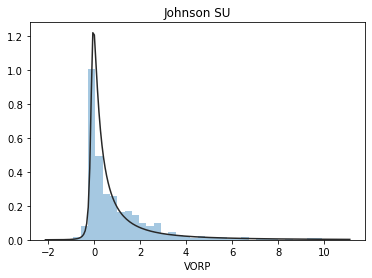

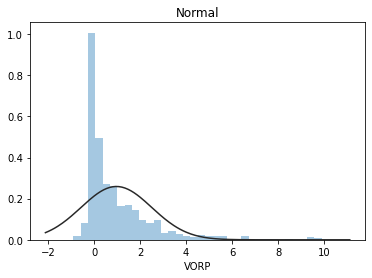

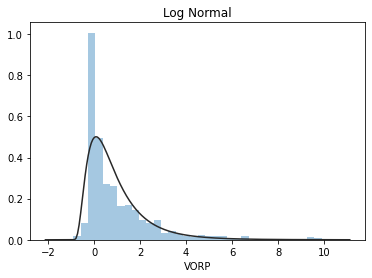

In [21]:
import scipy.stats as st
y = df['VORP']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [22]:
df[['name','VORP']].sort_values('VORP', ascending=False).head(20)

,name,VORP
3,Chris Paul,9.9
103,Kevin Durant,9.6
197,Stephen Curry,9.5
151,Russell Westbrook,9.3
193,James Harden,9.3
479,Nikola Jokić,8.6
152,Kevin Love,7.7
406,Giannis Antetokounmpo,7.4
300,Kawhi Leonard,7.1
338,Anthony Davis,6.7


#### Distributions:

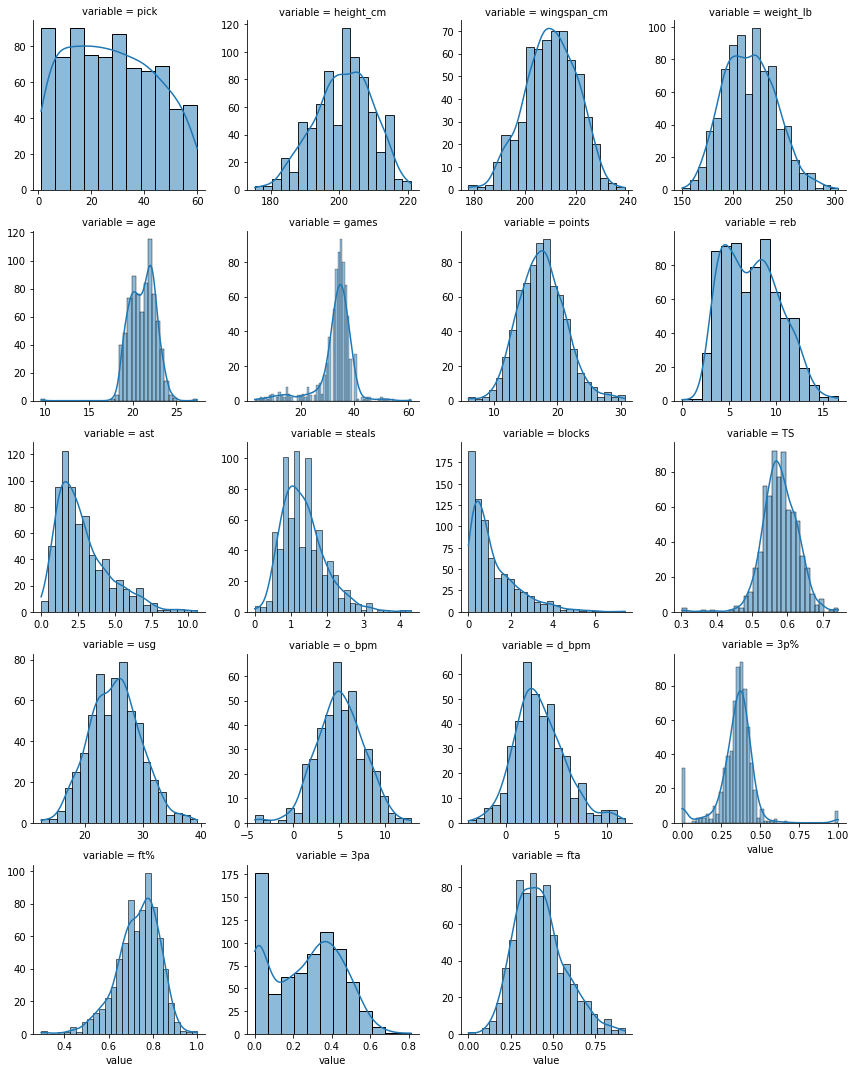

In [23]:
f = pd.melt(df, value_vars=numerical)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True);

Not all variables are normally distributed, we will work on this during feature engineering.

#### Correlations:

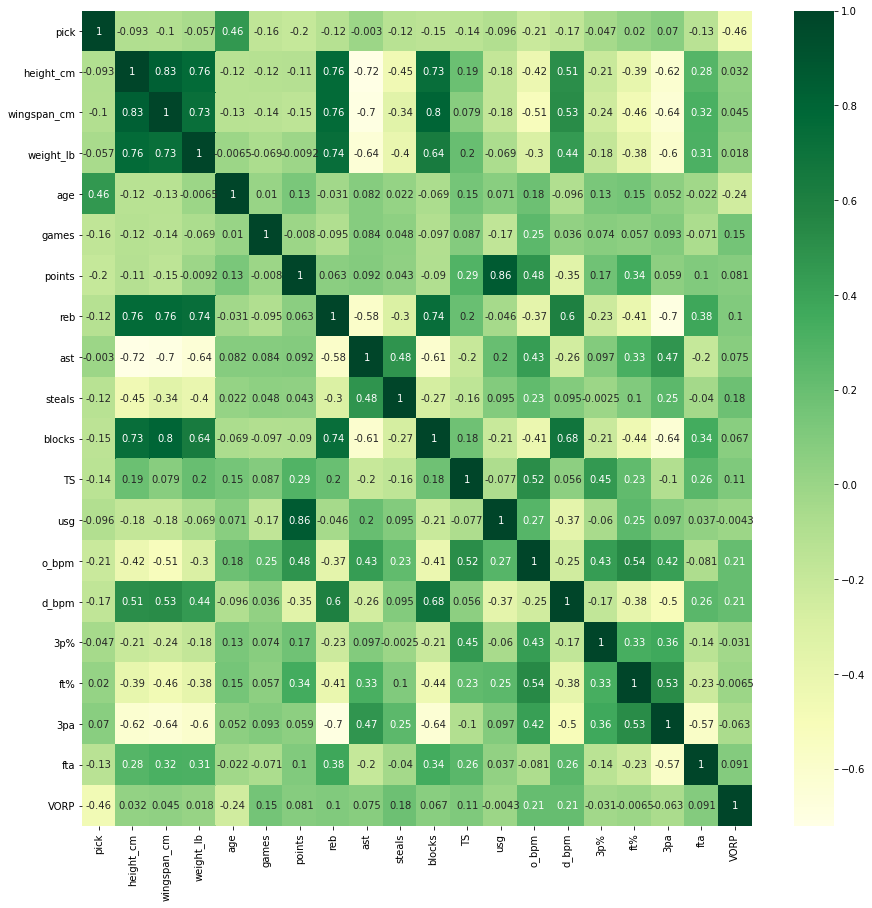

In [24]:
corr = df.corr(method='spearman')
plt.subplots(figsize=(15,15))
sns.heatmap(corr, cmap = 'YlGn', annot=True);

**Some observations:**
* **Physical Traits**: Height, wingspan and weight are very highly correlated with each other, this makes intuitive sense.
    * Furthermore, we see that these features show a high correlation with rebounds, blocks, and DBPM: while the first two seem fairly self-explanatory, the latter might have to do with high correlation between DBPM and rebounds/blocks.
    * On the flip side, the physical traits are negatively correlated with assists, steals, free throw %, 3-point attempts, OBPM and usage: Here, we see that in a lot of these negative correlations, weight has a lower intensity, this is probably due to examples like Giannis Antetokoumpo and Zion Williamson, who are great ball-handlers and use their weight to create plays.
    
* **Box Score Stats**: Points, rebounds, assists, blocks and steals.
    * Points scored are very strongly positively correlated with usage, which makes sense as a player with the ball in their hands more often will likely score more points. The same logic applies to assists and usage, despite the intensity being smaller.
    * 


### 2.1. Categorical varaibles:

In [25]:
# data corrections
df['c_year'] = np.where(df['c_year']=='2007','Freshman',df['c_year'])
df['position'] = np.where(df['position']=='C/','C',df['position'])

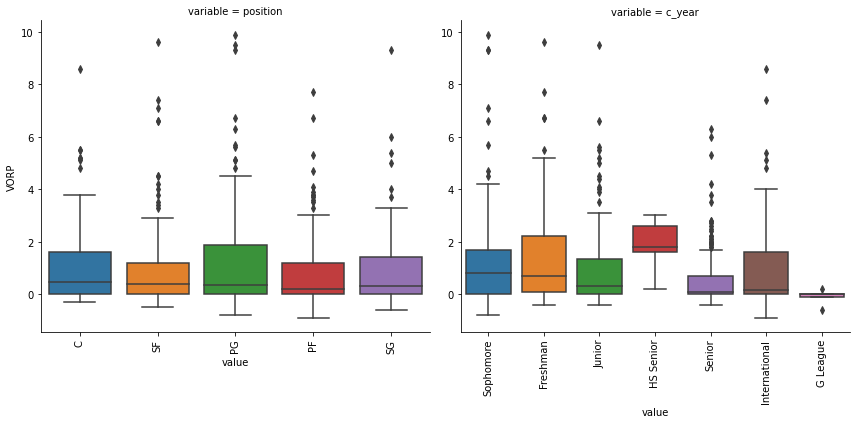

In [26]:
for c in category:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['VORP'], value_vars=category)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=6)
g = g.map(boxplot, "value", "VORP")

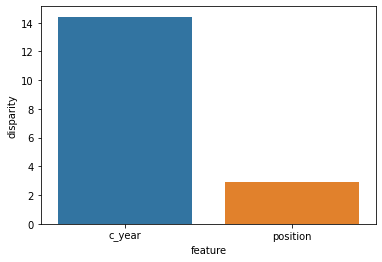

In [27]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = category
    pvals = []
    for c in category:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['VORP'].values
            samples.append(s)
        pval = st.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity');

The above is a quick (and rough) estimation of how much the feature impacts the target variable. The low impact of position is fine becuase we want to find the players that are projected to be valuable at every position. We will keep this variable as it helps provide context to other stats, as seen below:

In [28]:
df_vorp = df.corr(method='spearman')[['VORP']]
for i in df['position'].unique():
    df_vorp[i] = df[df['position']==i].corr(method='spearman')['VORP']

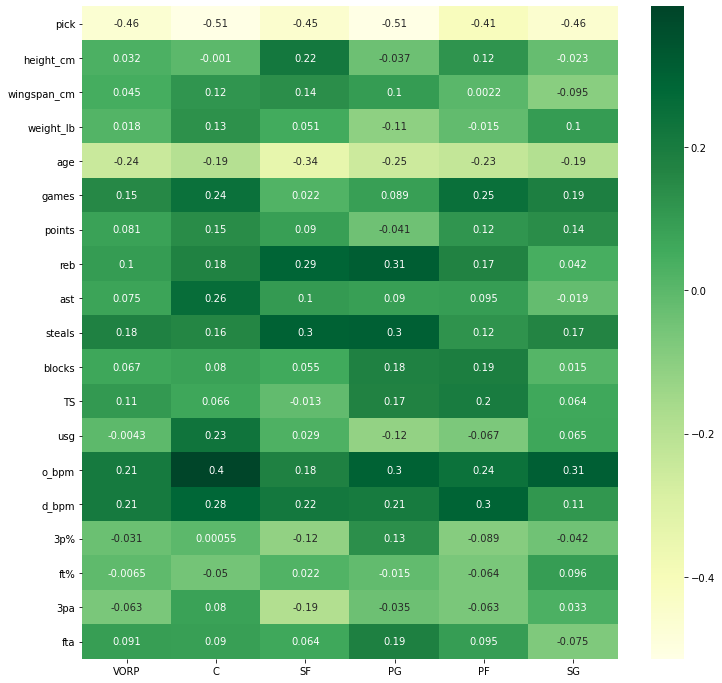

In [29]:
plt.subplots(figsize=(12,12))
sns.heatmap(df_vorp.drop(index='VORP'), cmap='YlGn', annot=True);

While the position variable itself does not impact VORP directly, the heatmap above shows us that it impacts the other variables and how they interact with VORP.

### 3. Feature Engineering:

##### 3.1 - Wingspan colinearity,

Earlier, we discussed how the physical traits are highly correlated with each other. Perhaps the biggest offender of this sort are the height and wingspan traits. However, instead of dropping one of the two - we will use some intuition to change the way we use the feature.

In [30]:
df['wingspan_cm'] = df['wingspan_cm'] - df['height_cm']

Here, we have simply used wingspan as a difference between the wingspan and the height. This is because players in all positions can create impact on the defensive end with wingspans higher than their heights, this also reduces the correlation between the two variables and shows a more meaningful relationship with defensive box +/-.

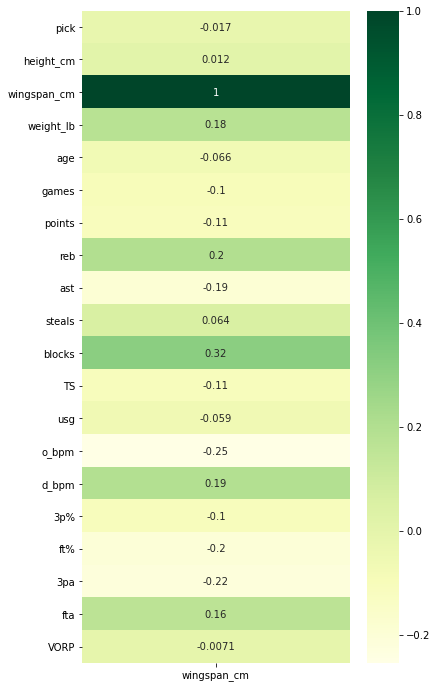

In [31]:
df_wingspan = df.corr(method='spearman')[['wingspan_cm']]
plt.subplots(figsize=(6,12))
sns.heatmap(df_wingspan, cmap='YlGn', annot=True);

##### 3.2 - Getting dummy variables for categorical variables.

In [32]:
df = pd.get_dummies(df.drop(columns='name'))
df

,pick,height_cm,wingspan_cm,weight_lb,age,games,points,reb,ast,steals,...,position_PG,position_SF,position_SG,c_year_Freshman,c_year_G League,c_year_HS Senior,c_year_International,c_year_Junior,c_year_Senior,c_year_Sophomore
0,1,214.0,7.0,251,20.6,35.0,21.0,12.6,2.4,1.0,...,0,0,0,0,0,0,0,0,0,1
1,2,203.8,18.4,228,19.0,36.0,18.3,10.6,1.2,1.8,...,0,1,0,1,0,0,0,0,0,0
2,3,189.9,8.9,202,20.9,39.0,13.4,3.9,7.2,1.0,...,1,0,0,0,0,0,0,1,0,0
3,4,185.4,8.3,178,20.1,32.0,16.4,4.8,7.1,2.6,...,1,0,0,0,0,0,0,0,0,1
4,5,183.5,10.2,199,20.9,36.0,14.6,4.9,7.8,2.3,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,47,201.3,5.1,221,20.4,37.0,18.0,6.6,1.0,0.9,...,0,1,0,1,0,0,0,0,0,0
781,32,200.7,NaN,201,20.6,34.0,10.0,4.6,2.9,1.2,...,1,0,0,0,0,0,1,0,0,0
782,12,208.3,NaN,220,20.2,10.0,14.2,9.1,3.0,1.1,...,0,0,0,0,0,0,1,0,0,0
783,23,210.8,NaN,250,19.5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [33]:
# We will be dropping rows where 'games' is nan, because 
# these are the players who were drafted without playing any minutes at a high enough level to count.

df = df[~ df['games'].isnull()]

# the remaining players will have their ft and 3p percentages imputed with 0, as these players did not attempt a
# single freethrow or 3-pointer.

df['ft%'].fillna(0, inplace=True)
df['3p%'].fillna(0, inplace=True)

D:\Applications\conda\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Let's have a look at the missing values at the end of this.

In [34]:
def missing(df):
    df_na = (df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :df_na})
    return missing_data

In [35]:
missing(df)

,Missing Ratio
d_bpm,44.217687
o_bpm,44.217687
wingspan_cm,22.176871
usg,18.367347


##### 3.3 - Missing value imputation.

In [36]:
df = df.reset_index(drop=True)

In [37]:
a = list(missing(df)['Missing Ratio'].index)

In [38]:
df[a]

,d_bpm,o_bpm,wingspan_cm,usg
0,NaN,NaN,7.0,29.7
1,NaN,NaN,18.4,21.1
2,NaN,NaN,8.9,22.5
3,NaN,NaN,8.3,21.5
4,NaN,NaN,10.2,20.4
...,...,...,...,...
730,2.4,5.3,5.0,32.2
731,3.2,4.3,5.1,26.1
732,NaN,NaN,NaN,NaN
733,NaN,NaN,NaN,NaN


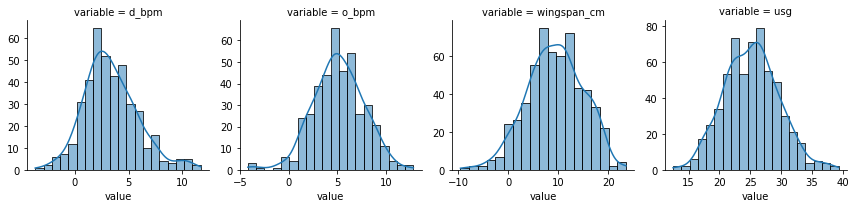

In [39]:
def distribs(df, a):
    f = pd.melt(df, value_vars=a)
    g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.histplot, 'value', kde=True);

distribs(df,a)

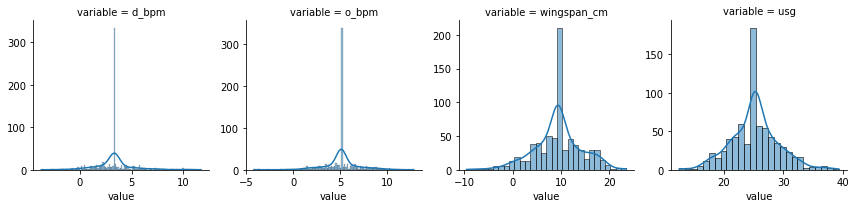

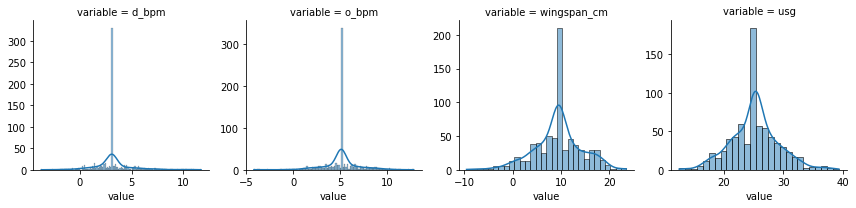

In [40]:
# we will try to impute using mean and median

from sklearn.impute import SimpleImputer

def impute(df, strat):
    imputer = SimpleImputer(strategy=strat)
    df_impute = deepcopy(df)
    imputer.fit(df_impute)
    X = imputer.transform(df_impute)
    df_imp = pd.DataFrame(X, columns = df_impute.columns)

    distribs(df_imp,a)
    
impute(df[a],'mean')
impute(df[a],'median')

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

def regr_impute(df):
    df1 = deepcopy(df)
    a = list(missing(df)['Missing Ratio'].index)
    for i in a:
        a = list(missing(df1)['Missing Ratio'].index)
        c = [c for c in df1.columns if c not in a]
        X = df1[df1[i].notnull()].loc[:, c].values
        y = df1[df1[i].notnull()][i].values
        yy = df1[df1[i].isnull()][i].values


        np.random.seed(42)
        kf = KFold(n_splits=4)
        scores = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            clf = LinearRegression()
            clf.fit(X_train, y_train)

        df_1 = df1[df1[i].notnull()]
        df_2 = df1[df1[i].isnull()]

        yy_pred = clf.predict(df1[df1[i].isnull()].loc[:, c].values)
        
        df_2.loc[:,i] = yy_pred

        df1 = df_1.append(df_2)
    
    return df1

df1 = regr_impute(df)

D:\Applications\conda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
D:\Applications\conda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
D:\Applications\conda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [42]:
df1

,pick,height_cm,wingspan_cm,weight_lb,age,games,points,reb,ast,steals,...,position_PG,position_SF,position_SG,c_year_Freshman,c_year_G League,c_year_HS Senior,c_year_International,c_year_Junior,c_year_Senior,c_year_Sophomore
267,1,191.8,1.200000,191,19.2,11.0,22.8,4.4,5.6,1.9,...,1,0,0,1,0,0,0,0,0,0
268,2,205.1,12.100000,248,20.1,38.0,23.4,9.9,1.4,1.2,...,0,0,0,0,0,0,0,0,0,1
269,4,205.1,11.400000,227,20.3,36.0,15.4,9.2,1.5,1.1,...,0,0,0,1,0,0,0,0,0,0
271,8,191.1,8.900000,177,19.5,38.0,17.4,4.0,4.2,0.7,...,1,0,0,1,0,0,0,0,0,0
272,9,185.4,6.400000,184,21.1,41.0,22.5,5.2,4.3,1.8,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,20,213.4,-5.550245,222,20.7,46.0,16.8,6.6,1.3,1.5,...,0,0,0,0,0,0,1,0,0,0
715,32,198.1,-0.006942,190,19.9,45.0,13.2,3.4,0.8,1.1,...,0,0,1,0,0,0,1,0,0,0
717,4,221.0,-8.489131,230,19.9,50.0,18.5,7.7,0.9,1.5,...,0,0,0,0,0,0,1,0,0,0
732,32,200.7,-2.769975,201,20.6,34.0,10.0,4.6,2.9,1.2,...,1,0,0,0,0,0,1,0,0,0


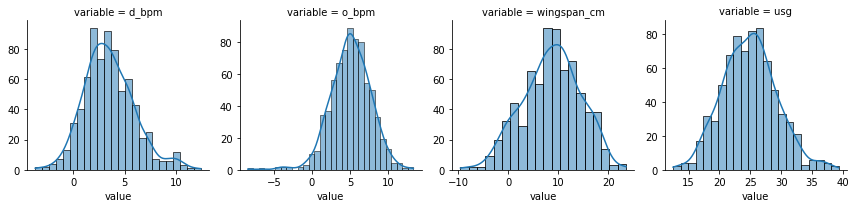

In [43]:
a = list(missing(df)['Missing Ratio'].index)
f = pd.melt(df1, value_vars=a)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True);

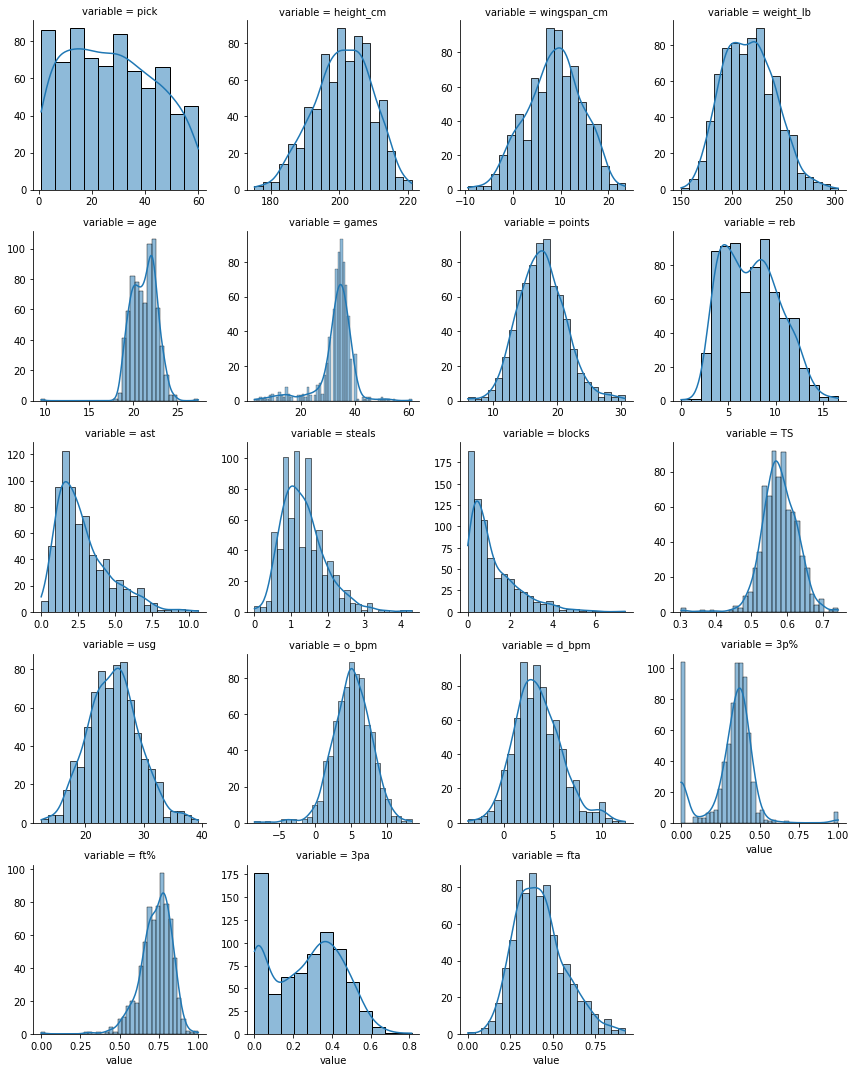

In [44]:
distribs(df1, numerical)

In [45]:
from scipy.stats import norm, skew

# Check the skew of all numerical features
skewed_feats = df1[numerical].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
blocks,1.641518
ast,1.224494
steals,1.006287
fta,0.603330
d_bpm,0.490318
reb,0.344655
points,0.287511
weight_lb,0.286905
usg,0.211304
pick,0.181362


In [46]:
skewness = skewness[abs(skewness['Skew']) > 0.2]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df1[feat] = boxcox1p(df1[feat], lam)

There are 16 skewed numerical features to Box Cox transform


In [47]:
skewness

,Skew
blocks,1.641518
ast,1.224494
steals,1.006287
fta,0.603330
d_bpm,0.490318
reb,0.344655
points,0.287511
weight_lb,0.286905
usg,0.211304
3p%,-0.211678


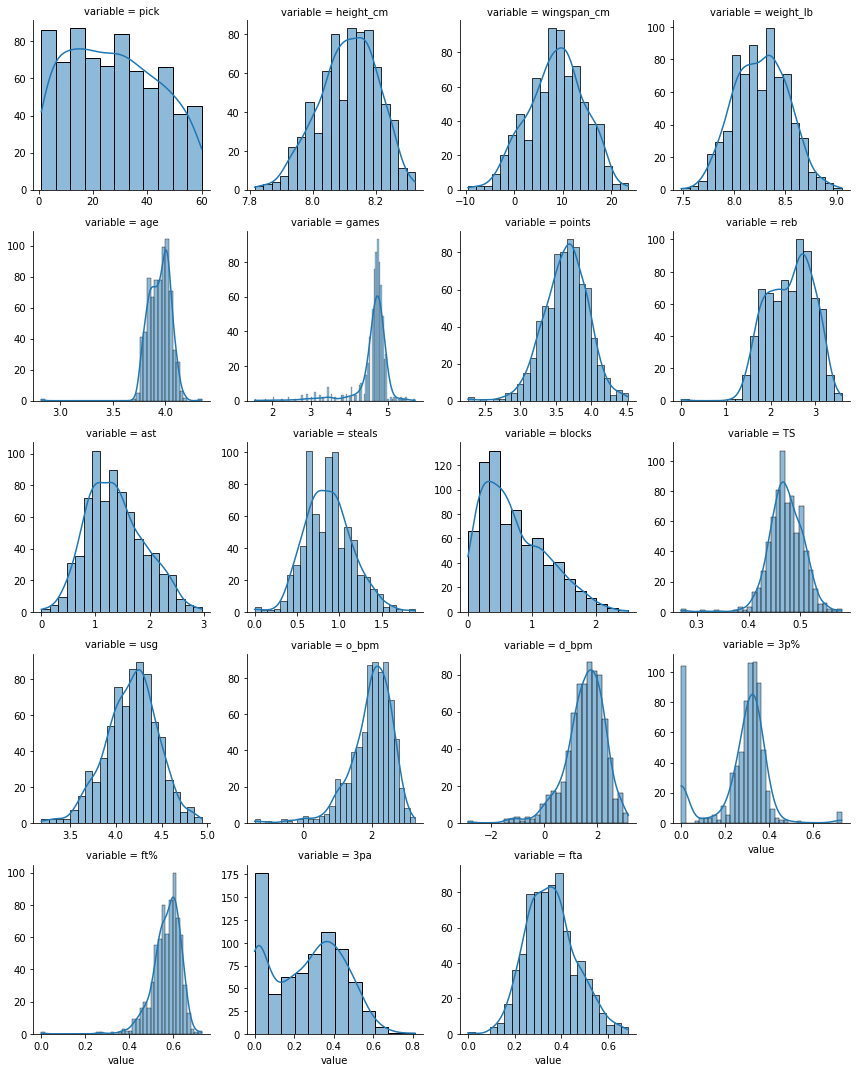

In [48]:
distribs(df1,numerical)

In [49]:
def final_transformation(df):
    df_n = deepcopy(df)
    # data corrections
    df_n.drop(columns=['name','pick'],inplace=True)
    df_n['c_year'] = np.where(df_n['c_year']=='2007','Freshman',df_n['c_year'])
    df_n['position'] = np.where(df_n['position']=='C/','C',df_n['position'])
    df_n['wingspan_cm'] = df_n['wingspan_cm'] - df_n['height_cm']
    numerical = [i for i in df_n.columns if df_n.dtypes[i] != 'object']
    numerical.remove('VORP')
    
    #one-hot-encoding
    df_n = pd.get_dummies(df_n)
    
    #missing value imputation
    df_n = df_n[~ df_n['games'].isnull()]
    df_n['ft%'].fillna(0, inplace=True)
    df_n['3p%'].fillna(0, inplace=True)
    df_n = df_n.reset_index(drop=True)
    a = list(missing(df_n)['Missing Ratio'].index)
    df_n = regr_impute(df_n)
        
    #transforming skewed features
    skewed_feats = df_n[numerical].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    skewness = pd.DataFrame({'Skew' :skewed_feats})
    skewness = skewness[abs(skewness['Skew']) > 0.75]
    skewed_features = skewness.index
    lam = 0
    for feat in skewed_features:
        df_n[feat] = boxcox1p(df_n[feat], lam)

    
    df_n = df_n.reset_index(drop=True)
        
    return df_n

In [50]:
df1

,pick,height_cm,wingspan_cm,weight_lb,age,games,points,reb,ast,steals,...,position_PG,position_SF,position_SG,c_year_Freshman,c_year_G League,c_year_HS Senior,c_year_International,c_year_Junior,c_year_Senior,c_year_Sophomore
267,1,8.011601,1.200000,8.002449,3.797664,3.011340,4.058284,1.918877,2.181236,1.154444,...,1,0,0,1,0,0,0,0,0,0
268,2,8.159212,12.100000,8.585749,3.866310,4.882973,4.098412,2.872770,0.935553,0.836976,...,0,0,0,0,0,0,0,0,0,1
269,4,8.159212,11.400000,8.385498,3.881226,4.792130,3.475607,2.778264,0.982247,0.784798,...,0,0,0,1,0,0,0,0,0,0
271,8,8.003595,8.900000,7.836797,3.820830,4.882973,3.652186,1.820334,1.870411,0.552317,...,1,0,0,1,0,0,0,0,0,0
272,9,7.937461,6.400000,7.920955,3.939723,5.012077,4.037896,2.098648,1.894838,1.113384,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,20,8.247276,-5.550245,8.335517,3.910703,5.210789,3.601000,2.370469,0.887176,0.982247,...,0,0,0,0,0,0,1,0,0,0
715,32,8.082566,-0.006942,7.990963,3.851273,5.172535,3.258824,1.659146,0.614477,0.784798,...,0,0,1,0,0,0,1,0,0,0
717,4,8.325406,-8.489131,8.415042,3.851273,5.357203,3.742451,2.555578,0.673768,0.982247,...,0,0,0,0,0,0,1,0,0,0
732,32,8.111298,-2.769975,8.114593,3.903378,4.697012,2.885846,1.965840,1.509852,0.836976,...,1,0,0,0,0,0,1,0,0,0


In [51]:
from sklearn.model_selection import train_test_split

X = df1.drop(columns = ['pick','VORP'])
y = df1['VORP']
y1 = df1['pick']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [52]:
X_train

,height_cm,wingspan_cm,weight_lb,age,games,points,reb,ast,steals,blocks,...,position_PG,position_SF,position_SG,c_year_Freshman,c_year_G League,c_year_HS Senior,c_year_International,c_year_Junior,c_year_Senior,c_year_Sophomore
22,8.165678,7.700000,8.658271,4.024181,4.263161,3.954066,3.082429,0.982247,0.486968,0.486968,...,0,0,0,0,0,0,0,0,1,0
237,8.075890,7.000000,8.190318,3.946908,4.647709,4.105019,2.278687,1.412268,0.982247,0.486968,...,0,0,1,0,0,0,0,1,0,0
11,8.096972,3.800000,8.284573,4.071754,4.647709,3.925270,2.490697,1.343298,0.784798,0.184838,...,0,1,0,0,0,0,0,0,1,0
400,8.046763,-2.500000,8.059126,4.010365,4.647709,3.939723,2.119710,2.160996,1.027379,0.095995,...,1,0,0,0,0,0,0,0,1,0
52,8.199897,14.600000,8.511220,3.975376,4.697012,3.194756,2.692764,0.730463,0.614477,1.845581,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,8.186050,12.700000,8.539411,3.851273,4.882973,3.484859,2.832918,0.730463,0.614477,1.113384,...,0,0,0,1,0,0,0,0,0,0
302,8.061367,5.700000,7.990963,3.896023,4.745132,3.484859,1.845581,2.423101,0.784798,0.000000,...,1,0,0,0,0,0,0,0,0,1
232,8.173202,10.100000,8.511220,3.954066,4.882973,3.494064,2.617971,0.730463,0.614477,0.982247,...,0,0,0,0,0,0,0,1,0,0
314,7.853851,8.900000,7.944503,4.031051,4.745132,3.782057,1.820334,2.423101,0.982247,0.095995,...,1,0,0,0,0,0,0,1,0,0


In [61]:
for i in range(1,len(a)+1):
    print(i)

1
2
3
4


In [62]:
from data_collection_module.tankathon_scraper import TankathonScrape

In [63]:
t_obj = TankathonScrape()
t_obj.scrape_link("http://www.tankathon.com/big_board")

starting player1..
done
starting player2..
done
starting player3..
done
starting player4..
done
starting player5..
done
starting player6..
done
starting player7..
done
starting player8..
done
starting player9..
done
starting player10..
done
starting player11..
done
starting player12..
done
starting player13..
done
starting player14..
done
starting player15..
done
starting player16..
done
starting player17..
done
starting player18..
done
starting player19..
done
starting player20..
done
starting player21..
done
starting player22..
done
starting player23..
done
starting player24..
done
starting player25..
done
starting player26..
done
starting player27..
done
starting player28..
done
starting player29..
done
starting player30..
done
starting player31..
done
starting player32..
done
starting player33..
done
starting player34..
done
starting player35..
done
starting player36..
done
starting player37..
done
starting player38..
done
starting player39..
done
starting player40..
done
starting 

ValueError: arrays must all be same length

In [55]:
# df_test = t_obj.df

In [56]:
# df_test = final_transformation(df)
# df_test

In [57]:
# df_na = (df_test.isnull().sum() / len(df_test)) * 100
# df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
# missing_data = pd.DataFrame({'Missing Ratio' :df_na})
# missing_data

In [58]:
# df_test